In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import linkage, dendrogram
from scipy.spatial.distance import squareform

In [2]:
traindf = pd.read_parquet('train.parquet', engine='pyarrow')

In [ ]:
testdf = pd.read_parquet('test.parquet', engine='pyarrow')

In [2]:
traindf.describe()

,horizon,ts_index,feature_a,feature_b,feature_c,feature_d,feature_e,feature_f,feature_g,feature_h,...,feature_ca,feature_cb,feature_cc,feature_cd,feature_ce,feature_cf,feature_cg,feature_ch,y_target,weight
count,5.337414e+06,5.337414e+06,5.337414e+06,5.337414e+06,5.337414e+06,5.337414e+06,5.337414e+06,5.337414e+06,5.337414e+06,5.278949e+06,...,5.337374e+06,5.337414e+06,5.334779e+06,4.937300e+06,5.061585e+06,5.101025e+06,5.297770e+06,5.337414e+06,5.337414e+06,5.337414e+06
mean,9.258638e+00,1.963320e+03,8.868155e+01,8.567391e+00,8.564846e+00,8.565059e+00,8.562926e+00,8.564357e+00,8.566521e+00,5.912386e-03,...,-2.811133e-01,-1.781311e-01,-4.609584e-01,-8.239401e-01,-2.288152e-02,1.472680e+00,1.062790e+00,2.323426e+00,-6.659048e-01,1.642788e+07
std,9.206252e+00,9.970220e+02,5.603141e+01,4.869982e+00,4.869406e+00,4.871465e+00,4.870096e+00,4.868880e+00,4.868368e+00,7.923729e-03,...,1.081776e+00,5.281133e-01,1.667862e+00,3.243581e+00,1.728989e-01,1.491990e+00,1.303983e+00,2.092968e+00,3.252764e+01,6.027074e+09
min,1.000000e+00,1.000000e+00,0.000000e+00,1.300042e-01,1.300016e-01,1.300009e-01,1.300028e-01,1.300075e-01,1.300021e-01,0.000000e+00,...,-9.311414e+01,-3.690332e+01,-1.346736e+02,-2.475901e+02,-7.684573e+00,6.128199e-03,1.606530e-02,0.000000e+00,-2.201882e+03,0.000000e+00
25%,1.000000e+00,1.148000e+03,4.000000e+01,4.350043e+00,4.350582e+00,4.346282e+00,4.346104e+00,4.347559e+00,4.348113e+00,3.744142e-04,...,-1.023971e-01,-1.325353e-01,-6.327619e-02,-1.022825e-01,-4.320754e-02,1.173612e-01,8.029312e-02,1.000000e+00,-1.290776e-01,1.553378e+01
50%,3.000000e+00,2.036000e+03,8.400000e+01,8.568381e+00,8.563840e+00,8.567354e+00,8.560350e+00,8.564697e+00,8.565921e+00,1.308027e-03,...,-1.306394e-02,-1.727560e-02,-1.316598e-02,-1.568063e-03,-1.886561e-03,1.197156e+00,1.594703e-01,2.000000e+00,-5.774818e-04,1.699384e+03
75%,1.000000e+01,2.814000e+03,1.330000e+02,1.278265e+01,1.278253e+01,1.278491e+01,1.278212e+01,1.278137e+01,1.278288e+01,1.047050e-02,...,-3.128947e-04,-2.017864e-04,-1.610013e-03,-5.537199e-04,1.675410e-02,2.524100e+00,1.991925e+00,3.000000e+00,5.106807e-02,1.641908e+05
max,2.500000e+01,3.601000e+03,2.130000e+02,1.700000e+01,1.700000e+01,1.700000e+01,1.700000e+01,1.700000e+01,1.700000e+01,1.109517e-01,...,0.000000e+00,-1.733807e-10,-9.195158e-11,4.884884e-05,2.642112e+00,1.363492e+01,1.056441e+01,1.000000e+01,2.314411e+03,1.391222e+13


In [6]:
testdf.describe()

,horizon,ts_index,feature_a,feature_b,feature_c,feature_d,feature_e,feature_f,feature_g,feature_h,...,feature_by,feature_bz,feature_ca,feature_cb,feature_cc,feature_cd,feature_ce,feature_cf,feature_cg,feature_ch
count,1.447107e+06,1.447107e+06,1.447107e+06,1.447107e+06,1.447107e+06,1.447107e+06,1.447107e+06,1.447107e+06,1.447107e+06,1.446927e+06,...,1.313911e+06,1.392472e+06,1.446135e+06,1.446135e+06,1.445543e+06,1.363220e+06,1.396089e+06,1.396089e+06,1.446226e+06,1.447107e+06
mean,9.226502e+00,3.994940e+03,8.923203e+01,8.567227e+00,8.565726e+00,8.568665e+00,8.570967e+00,8.561087e+00,8.559350e+00,5.646601e-03,...,-2.741288e-01,-4.042358e-01,-3.534151e-01,-3.046304e-01,-8.649312e-01,-1.516198e+00,-1.724116e-02,1.501898e+00,1.524774e+00,2.453627e+00
std,9.194302e+00,2.237628e+02,5.594713e+01,4.868354e+00,4.869183e+00,4.868254e+00,4.869914e+00,4.871455e+00,4.869805e+00,7.859243e-03,...,1.195196e+00,2.724305e+00,1.581161e+00,9.297504e-01,4.653338e+00,1.120760e+01,1.334211e-01,1.511240e+00,1.739919e+00,2.185287e+00
min,1.000000e+00,3.602000e+03,0.000000e+00,1.300002e-01,1.300079e-01,1.300015e-01,1.300048e-01,1.300058e-01,1.300040e-01,7.695854e-05,...,-9.250188e+01,-2.445242e+02,-1.902373e+02,-1.440998e+02,-4.905176e+02,-1.058896e+03,-1.459358e+00,9.081014e-03,2.336818e-02,0.000000e+00
25%,1.000000e+00,3.803000e+03,4.100000e+01,4.354533e+00,4.352187e+00,4.354597e+00,4.352651e+00,4.347044e+00,4.343839e+00,3.243844e-04,...,-1.168194e-01,-1.201363e-01,-1.568618e-01,-1.754196e-01,-9.252821e-02,-1.417727e-01,-4.583131e-02,1.359479e-01,8.693202e-02,1.000000e+00
50%,3.000000e+00,3.999000e+03,8.500000e+01,8.563669e+00,8.571614e+00,8.566641e+00,8.572758e+00,8.553458e+00,8.559464e+00,9.459802e-04,...,-9.945242e-03,-1.697993e-02,-2.997726e-02,-3.369771e-02,-1.894956e-02,-2.594504e-03,-2.675952e-03,1.202012e+00,2.046998e-01,2.000000e+00
75%,1.000000e+01,4.188000e+03,1.330000e+02,1.278475e+01,1.278344e+01,1.278319e+01,1.278980e+01,1.278471e+01,1.277660e+01,9.914945e-03,...,-6.957703e-04,-2.155124e-03,-5.030241e-04,-3.314885e-04,-2.444986e-03,-7.545049e-04,1.624080e-02,2.568319e+00,2.953138e+00,3.000000e+00
max,2.500000e+01,4.376000e+03,2.260000e+02,1.699999e+01,1.700000e+01,1.699994e+01,1.699997e+01,1.700000e+01,1.700000e+01,6.951122e-02,...,-1.226198e-05,-1.290461e-05,-1.318147e-05,-1.325947e-05,-4.282205e-06,-3.870923e-05,2.845932e+00,6.719634e+00,8.334006e+00,9.000000e+00


Split train data for parameter testing and model training

In [3]:
drop_cols = ['id', 'code', 'sub_code', 'sub_category', 'horizon', 'ts_index', 'y_target', 'weight']
col_list = traindf.columns.tolist()
for col in drop_cols:
    if col in col_list:
        traindf = traindf.drop(columns=[col])
        print(f'{col} dropped')

id dropped
code dropped
sub_code dropped
sub_category dropped
horizon dropped
ts_index dropped
y_target dropped
weight dropped


changing float64 to float32 for memory space

In [ ]:

col_list = traindf.columns.tolist()
'''
for col in col_list:
    print(f'{col}: {type(traindf[col][0])}')
'''
for col in col_list[1:]:
    traindf[col] = traindf[col].astype('float32')
    
'''
for col in col_list:
    print(f'{col}: {type(traindf[col][0])}')
'''

"\nfor col in col_list:\n    print(f'{col}: {type(traindf[col][0])}')\n"

testing correlation between between features without target present 
ie removing redundancy

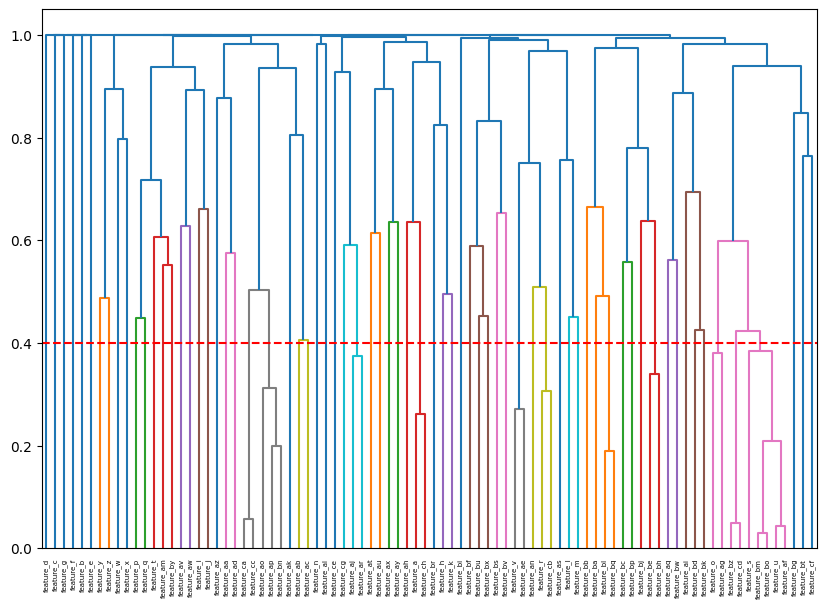

In [5]:
corr = traindf.corr().abs()

dissimilation = 1- corr
distance_matrix = squareform(dissimilation, checks=False)

Z = linkage(distance_matrix, method='complete')

plt.figure(figsize=(10, 7))
dendrogram(Z, labels=traindf.columns, leaf_rotation=90)
plt.axhline(y=0.4, color='r', linestyle='--')
plt.show()

Dropping features cc, ap, bn, ae, cb, bh, ar, ch, bq, ag, cd, bm, bo, u, af
below correlation threshold (0.4) - can change later

In [ ]:
col_list = traindf.columns.tolist()
print(len(col_list))


corr_drop_cols = ['feature_cc', 'feature_ap', 'feature_bn', 'feature_ae', 'feature_cb', 'feature_bh', 'feature_ar',
                  'feature_ch', 'feature_bq', 'feature_ag', 'feature_cd', 'feature_bm', 'feature_bo', 
                  'feature_u', 'feature_af']



col_list = traindf.columns.tolist()
for col in corr_drop_cols:
    if col in col_list:
        traindf = traindf.drop(columns=[col])
        print(f'{col} dropped')
print(len(traindf.columns.tolist()))

71
71


now going to test remaining columns correlations against target value

In [ ]:
traindf = pd.read_parquet('train.parquet', engine='pyarrow')

drop_cols = ['id', 'code', 'sub_code', 'sub_category', 'horizon', 'ts_index','weight']
col_list = traindf.columns.tolist()
for col in drop_cols:
    if col in col_list:
        traindf = traindf.drop(columns=[col])
        print(f'{col} dropped')

col_list = traindf.columns.tolist()
for col in col_list[1:]:
    traindf[col] = traindf[col].astype('float32')
corr_drop_cols = ['feature_cc', 'feature_ap', 'feature_bn', 'feature_ae', 'feature_cb', 'feature_bh', 'feature_ar',
                  'feature_ch', 'feature_bq', 'feature_ag', 'feature_cd', 'feature_bm', 'feature_bo', 
                  'feature_u', 'feature_af']
col_list = traindf.columns.tolist()
for col in corr_drop_cols:
    if col in col_list:
        traindf = traindf.drop(columns=[col])
        print(f'{col} dropped')
print(len(traindf.columns.tolist()))

id dropped
code dropped
sub_code dropped
sub_category dropped
horizon dropped
ts_index dropped
weight dropped


In [ ]:
target_corr = traindf.corr()['target'].sort_values(ascending=False)

print(target_corr)